# **Quadratic Program**

Formulation of the type

$$\begin{align*}
    \min_{x}: & \frac{1}{2}x^TPx + q^T x +s \\
    \textit{subject to}: \\
    & Gx \leq h \\
    & Ax = b \\
   l \leq & x \leq u\\
\end{align*}
$$

is known as a ***quadratic program*** with linear constraints due to quadratic nature of objective function. This particular class of problem are known as non-linear problem but are convex in nature. So, any local minima will be an eventual global minima for problem. \\

$x = \big[ x_1, x_2, \cdots x_n \big]$ is vector of decision variables. Further, $P$ is a positive (semi) definite matrix interpreted as coefficient of quadratic cost, $q$ is a vector of linear cost. $G$ is a matrix of coefficient of constraints and $h$ is vector of constraint capacity bounds. Similarly, $A$ and $b$ are matrix and vector representation of system affline constrants. Here, $l$ and $u$ are bounds on decision variable $x$.

Rewrite above equation in matrix notation and use below ready to made code in order to solve above optimization problem. You need to identify, $P$, $q$, $s$, $G$, $h$, $A$ $b$, $l$, $u$ from above given system.

In [ ]:
#question 1

In [1]:
# Install and import pyomo
!pip install -q pyomo
from pyomo.environ import *

# Install solver as well into collab session
!apt-get install -y -qq glpk-utils

import pandas as pd
import numpy as np

# installing qpsolvers from web
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

Question 1: Best Fit: Minimizing Least Square Estimates

We need linear model of form
$$\hat{r}_i=b_0+b_1\tilde{R}+b_2R$$
We would like to minimize residuals:

$$e_i=r_i-\hat{r_i} $$

In [ ]:
interestrates  =pd.read_csv('Lab08_InterestRate.csv')
interestrates

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [ ]:
ratio = interestrates['Ratio'].to_numpy()
ratio

array([0.3615, 0.282 , 0.301 , 0.3862, 0.3578, 0.4413, 0.6753, 0.6777,
       0.6585, 0.6702, 0.3289, 0.2473, 0.2762, 0.3222, 0.2792, 0.3609,
       0.6187, 0.6176, 0.6004, 0.6119])

In [ ]:
rating = interestrates['Rating'].to_numpy()
rating

array([85.6, 91.9, 89.1, 90.4, 86.3, 74.7, 79.8, 74.3, 84.4, 84.1, 86.8,
       93.7, 92.3, 94. , 88.9, 74.3, 74. , 69.8, 81.6, 81. ])

In [ ]:
actual = interestrates['Interest Rate'].to_numpy()
actual

array([0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507,
       0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504,
       0.0478, 0.0549, 0.0468, 0.0478])

In [ ]:
n = len(actual)
n

20

In [ ]:
A = np.zeros((n,3))
for i in range(n):
  A[i][0] = 1
  A[i][1] = ratio[i]
  A[i][2] = rating[i]


In [ ]:
#the P = 2 A ^T  A

P = 2*np.matmul(A.transpose(), A)

In [ ]:
#q = -2 A^T r
q= -2*np.matmul(A.transpose(), actual)

In [ ]:
# q = q.transpose()

In [ ]:
lower = np.array([0, None, None])

In [ ]:
# lb

In [ ]:
solve_qp(P, q, G = None, h = None, A = None, b =None, lb=lower, ub=None, solver = "osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


TypeError: ignored

In [ ]:
#predicted data
x = np.array([ 0.09128332,  0.01686998, -0.00069351])
rhat = np.matmul(A,x)

<ipython-input-44-0ba82699cada>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= actual, palette='pastel', marker='o',color = 'red', label = 'Actual')
<ipython-input-44-0ba82699cada>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = rhat, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')


([<matplotlib.axis.XTick at 0x7f743419d600>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

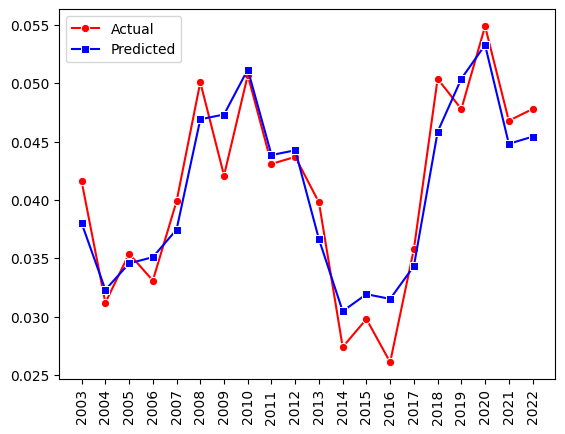

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
years = interestrates.Year.to_list()
sns.lineplot(x = years, y= actual, palette='pastel', marker='o',color = 'red', label = 'Actual')
sns.lineplot(x = years, y = rhat, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')
plt.xticks(years, rotation = 90)

In [ ]:
#our total objective cost is rhat - actual squared sum
sum((rhat - actual)**2)

0.00015852964999978127

In [ ]:
#if we remove the bounds on b0 , then ,
new  = solve_qp(P, q, G = None, h = None, A = None, b =None, lb=None, ub=None, solver = "osqp")

In [ ]:
new

array([ 0.12237613,  0.00576031, -0.00100316])

<ipython-input-57-1fa72c085e0c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y= actual, palette='pastel', marker='o',color = 'red', label = 'Actual')
<ipython-input-57-1fa72c085e0c>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = years, y = newhat, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')


([<matplotlib.axis.XTick at 0x7f74341f4df0>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

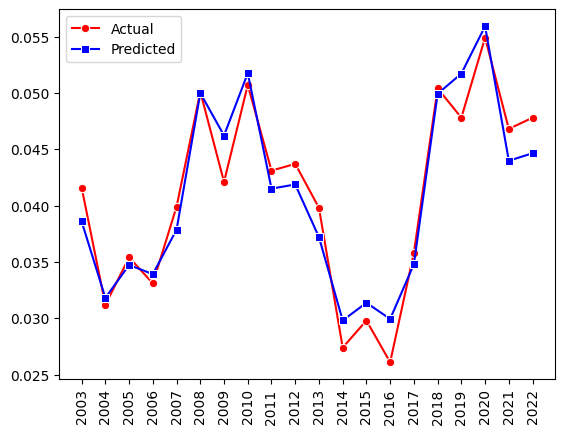

In [ ]:
newhat = np.matmul(A,new)

sns.lineplot(x = years, y= actual, palette='pastel', marker='o',color = 'red', label = 'Actual')
sns.lineplot(x = years, y = newhat, palette = 'pastel', marker='s', color = 'blue', label = 'Predicted')
plt.xticks(years, rotation = 90)

In [ ]:
#here our cost is :
sum((newhat - actual)**2)

0.00010381449104458336

In [ ]:
0.00010381449104458336 < 0.00015852964999978127

True

In [ ]:
#our new cost is lower than when we bounded the variables.